In [20]:
from google.colab import files

uploaded = files.upload()

Saving norwood_1.png to norwood_1 (2).png
Saving norwood_2.png to norwood_2 (2).png
Saving norwood_3.png to norwood_3 (2).png
Saving norwood_4.png to norwood_4 (2).png


Add my test images to colab


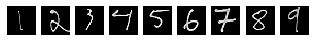

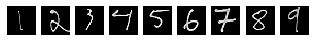

In [110]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from google.colab import files
import input_data
import tensorflow as tf 
import cv2

x = tf.placeholder("float", [None, 784])


images = np.zeros((9,28, 28, 1))

for a in range(2,11):
  gray = cv2.imread("norwood"+str(a-1)+".png",cv2.IMREAD_GRAYSCALE)

  gray = gray.reshape(1,28,28,1)

  # flatten = gray.flatten()/255.0

  images[a-2]=gray

imagesDeep = np.zeros((9,784))

for a in range(2,11):
  gray = cv2.imread("norwood"+str(a-1)+".png",cv2.IMREAD_GRAYSCALE)

  gray = gray.reshape(1,784)

  # flatten = gray.flatten()/255.0

  imagesDeep[a-2]=gray

for i in range(9):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()


for i in range(9):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imagesDeep[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()


# https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4


convolutional.autoencoder.py

In [65]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8), i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# To train it, use the original MNIST digits with shape (samples, 3, 28, 28),
# and just normalize pixel values between 0 and 1

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    # adapt this if using 'channels_first' image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))       # adapt this if using 'channels_first' image data format

# open a terminal and start TensorBoard to read logs in the autoencoder subdirectory
# tensorboard --logdir=autoencoder

autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)

# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

# take a look at the 128-dimensional encoded representation
# these representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 0.2185 - val_loss: 0.1694
Epoch 2/50
 - 3s - loss: 0.1558 - val_loss: 0.1453
Epoch 3/50
 - 4s - loss: 0.1397 - val_loss: 0.1370
Epoch 4/50
 - 3s - loss: 0.1309 - val_loss: 0.1273
Epoch 5/50
 - 3s - loss: 0.1256 - val_loss: 0.1220
Epoch 6/50
 - 4s - loss: 0.1220 - val_loss: 0.1198
Epoch 7/50
 - 3s - loss: 0.1191 - val_loss: 0.1179
Epoch 8/50
 - 4s - loss: 0.1174 - val_loss: 0.1154
Epoch 9/50
 - 4s - loss: 0.1158 - val_loss: 0.1165
Epoch 10/50
 - 3s - loss: 0.1145 - val_loss: 0.1129
Epoch 11/50
 - 3s - loss: 0.1134 - val_loss: 0.1146
Epoch 12/50
 - 3s - loss: 0.1125 - val_loss: 0.1087
Epoch 13/50
 - 4s - loss: 0.1114 - val_loss: 0.1102
Epoch 14/50
 - 3s - loss: 0.1108 - val_loss: 0.1104
Epoch 15/50
 - 3s - loss: 0.1101 - val_loss: 0.1100
Epoch 16/50
 - 3s - loss: 0.1093 - val_loss: 0.1070
Epoch 17/50
 - 4s - loss: 0.1089 - val_loss: 0.1080
Epoch 18/50
 - 4s - loss: 0.1082 - val_loss: 0.1080
Epoch 19/50
 - 3s - los

ValueError: ignored

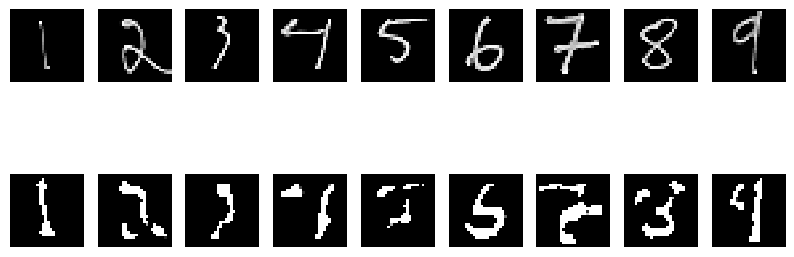

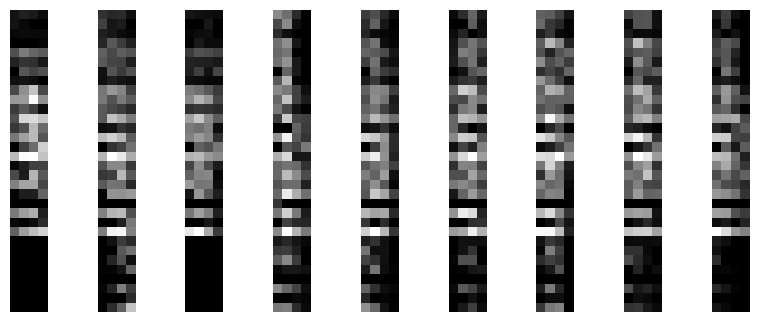

In [101]:
decoded_test = autoencoder.predict(images)

n = 9
plt.figure(figsize=(10, 4), dpi=100)
for i in range(9):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

# take a look at the 128-dimensional encoded representation
# these representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(images)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

n = 9
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

deep_encoder.py

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.3222 - val_loss: 0.2626
Epoch 2/100
 - 1s - loss: 0.2539 - val_loss: 0.2440
Epoch 3/100
 - 2s - loss: 0.2328 - val_loss: 0.2200
Epoch 4/100
 - 2s - loss: 0.2126 - val_loss: 0.2044
Epoch 5/100
 - 1s - loss: 0.1992 - val_loss: 0.1915
Epoch 6/100
 - 1s - loss: 0.1863 - val_loss: 0.1803
Epoch 7/100
 - 1s - loss: 0.1786 - val_loss: 0.1738
Epoch 8/100
 - 1s - loss: 0.1722 - val_loss: 0.1683
Epoch 9/100
 - 1s - loss: 0.1663 - val_loss: 0.1624
Epoch 10/100
 - 1s - loss: 0.1617 - val_loss: 0.1588
Epoch 11/100
 - 2s - loss: 0.1578 - val_loss: 0.1554
Epoch 12/100
 - 1s - loss: 0.1544 - val_loss: 0.1505
Epoch 13/100
 - 2s - loss: 0.1518 - val_loss: 0.1481
Epoch 14/100
 - 1s - loss: 0.1490 - val_loss: 0.1478
Epoch 15/100
 - 1s - loss: 0.1465 - val_loss: 0.1442
Epoch 16/100
 - 2s - loss: 0.1442 - val_loss: 0.1403
Epoch 17/100
 - 1s - loss: 0.1422 - val_loss: 0.1406
Epoch 18/100
 - 1s - loss: 0.140

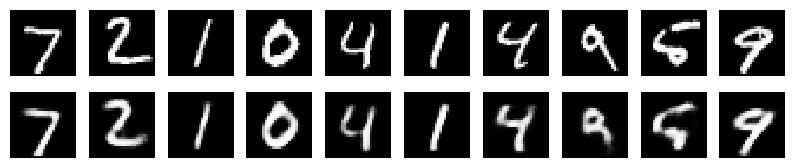

In [105]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Deep Autoencoder

features_path = 'deep_autoe_features.pickle'
labels_path = 'deep_autoe_labels.pickle'

# this is the size of our encoded representations
encoding_dim = 32   # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder; 784 = 28 x 28
input_img = Input(shape=(784, ))

my_epochs = 100

# "encoded" is the encoded representation of the inputs
encoded = Dense(encoding_dim * 4, activation='relu')(input_img)
encoded = Dense(encoding_dim * 2, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim * 2, activation='relu')(encoded)
decoded = Dense(encoding_dim * 4, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Separate Encoder model

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Separate Decoder model

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim, ))
# retrieve the layers of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

# Train to reconstruct MNIST digits

# configure model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
(x_train, _), (x_test, y_test) = mnist.load_data()

# normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Train autoencoder for 50 epochs

autoencoder.fit(x_train, x_train, epochs=my_epochs, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                verbose=2)

# after 100 epochs the autoencoder seems to reach a stable train/test lost value

# Visualize the reconstructed encoded representations

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# save latent space features 32-d vector
pickle.dump(encoded_imgs, open(features_path, 'wb'))
pickle.dump(y_test, open(labels_path, 'wb'))

n = 10  # how many digits we will display
plt.figure(figsize=(10, 2), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

In [111]:
encoded_imgs = encoder.predict(imagesDeep)
decoded_imgs = decoder.predict(encoded_imgs)

# save latent space features 32-d vector
pickle.dump(encoded_imgs, open(features_path, 'wb'))
pickle.dump(y_test, open(labels_path, 'wb'))

n = 10  # how many digits we will display
plt.figure(figsize=(10, 2), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

InvalidArgumentError: ignored

image_denoising.py

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 0.1741 - val_loss: 0.1219
Epoch 2/100
 - 4s - loss: 0.1187 - val_loss: 0.1127
Epoch 3/100
 - 4s - loss: 0.1118 - val_loss: 0.1085
Epoch 4/100
 - 4s - loss: 0.1085 - val_loss: 0.1048
Epoch 5/100
 - 4s - loss: 0.1060 - val_loss: 0.1052
Epoch 6/100
 - 4s - loss: 0.1045 - val_loss: 0.1041
Epoch 7/100
 - 3s - loss: 0.1033 - val_loss: 0.1023
Epoch 8/100
 - 4s - loss: 0.1026 - val_loss: 0.1001
Epoch 9/100
 - 4s - loss: 0.1018 - val_loss: 0.1024
Epoch 10/100
 - 4s - loss: 0.1012 - val_loss: 0.0996
Epoch 11/100
 - 4s - loss: 0.1007 - val_loss: 0.1011
Epoch 12/100
 - 3s - loss: 0.1004 - val_loss: 0.0992
Epoch 13/100
 - 3s - loss: 0.0999 - val_loss: 0.0991
Epoch 14/100
 - 4s - loss: 0.0996 - val_loss: 0.0987
Epoch 15/100
 - 3s - loss: 0.0993 - val_loss: 0.0981
Epoch 16/100
 - 4s - loss: 0.0992 - val_loss: 0.0986
Epoch 17/100
 - 4s - loss: 0.0989 - val_loss: 0.0982
Epoch 18/100
 - 4s - loss: 0.0987 - val_loss: 0.0971
Epoch

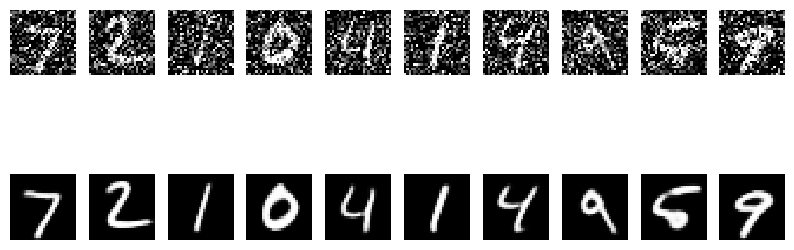

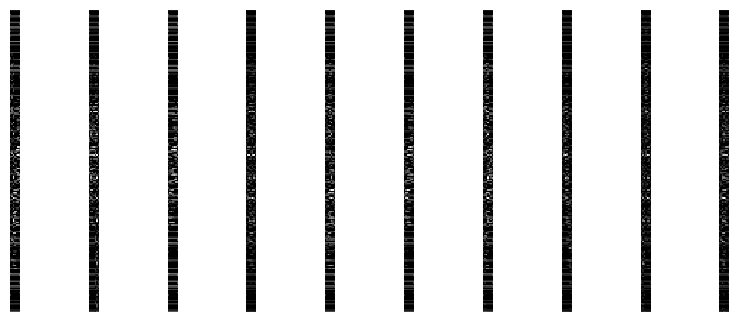

In [3]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# To train it, use the original MNIST digits with shape (samples, 3, 28, 28),
# and just normalize pixel values between 0 and 1

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    # adapt this if using 'channels_first' image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))       # adapt this if using 'channels_first' image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# open a terminal and start TensorBoard to read logs in the autoencoder subdirectory
# tensorboard --logdir=autoencoder

autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test), verbose=2,
                callbacks=[TensorBoard(log_dir='noisy', histogram_freq=0, write_grads=False)])

# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

# take a look at the x-dimensional encoded representation
# these representations are 32x7x7, so we reshape them in order to be able to display them as grayscale images

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 1568-d vector
pickle.dump(encoded_imgs, open('denoise_autoe_features.pickle', 'wb'))

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(7, 7 * 32).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

simple_autoencoder.py

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 1s - loss: 0.3633 - val_loss: 0.2742
Epoch 2/100
 - 1s - loss: 0.2681 - val_loss: 0.2586
Epoch 3/100
 - 1s - loss: 0.2494 - val_loss: 0.2380
Epoch 4/100
 - 1s - loss: 0.2303 - val_loss: 0.2198
Epoch 5/100
 - 1s - loss: 0.2139 - val_loss: 0.2057
Epoch 6/100
 - 1s - loss: 0.2018 - val_loss: 0.1955
Epoch 7/100
 - 1s - loss: 0.1929 - val_loss: 0.1878
Epoch 8/100
 - 1s - loss: 0.1860 - val_loss: 0.1817
Epoch 9/100
 - 1s - loss: 0.1803 - val_loss: 0.1765
Epoch 10/100
 - 1s - loss: 0.1753 - val_loss: 0.1717
Epoch 11/100
 - 1s - loss: 0.1709 - val_loss: 0.1674
Epoch 12/100
 - 1s - loss: 0.1668 - val_loss: 0.1635
Epoch 13/100
 - 1s - loss: 0.1630 - val_loss: 0.1600
Epoch 14/100
 - 1s - loss: 0.1597 - val_loss: 0.1568
Epoch 15/100
 - 1s - loss: 0.1566 - val_loss: 0.1537
Epoch 16/100
 - 1s - loss: 0.1537 - val_loss: 0.1509
Epoch 17/100
 - 1s - loss: 0.1510 - val_loss: 0.1482
Epoch 18/100
 - 1s - loss: 0.148

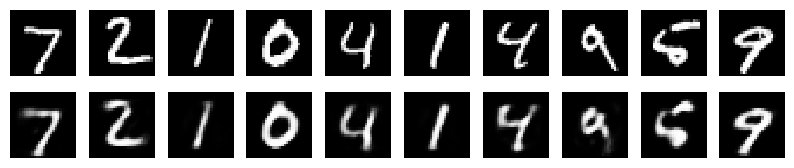

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Single fully-connected neural layer as encoder and decoder

use_regularizer = True
my_regularizer = None
my_epochs = 50
features_path = 'simple_autoe_features.pickle'
labels_path = 'simple_autoe_labels.pickle'

if use_regularizer:
    # add a sparsity constraint on the encoded representations
    # note use of 10e-5 leads to blurred results
    my_regularizer = regularizers.l1(10e-8)
    # and a larger number of epochs as the added regularization the model
    # is less likely to overfit and can be trained longer
    my_epochs = 100
    features_path = 'sparse_autoe_features.pickle'
    labels_path = 'sparse_autoe_labels.pickle'

# this is the size of our encoded representations
encoding_dim = 32   # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder; 784 = 28 x 28
input_img = Input(shape=(784, ))

# "encoded" is the encoded representation of the inputs
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=my_regularizer)(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Separate Encoder model

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Separate Decoder model

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Train to reconstruct MNIST digits

# configure model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
(x_train, _), (x_test, y_test) = mnist.load_data()

# normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Train autoencoder for 50 epochs

autoencoder.fit(x_train, x_train, epochs=my_epochs, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                verbose=2)

# after 50/100 epochs the autoencoder seems to reach a stable train/test lost value

# Visualize the reconstructed encoded representations

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# save latent space features 32-d vector
pickle.dump(encoded_imgs, open(features_path, 'wb'))
pickle.dump(y_test, open(labels_path, 'wb'))

n = 10  # how many digits we will display
plt.figure(figsize=(10, 2), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()

variational_autoencoder.py


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            514         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            514         dense_1[0][0]                    
___________________________________________________________________________________________

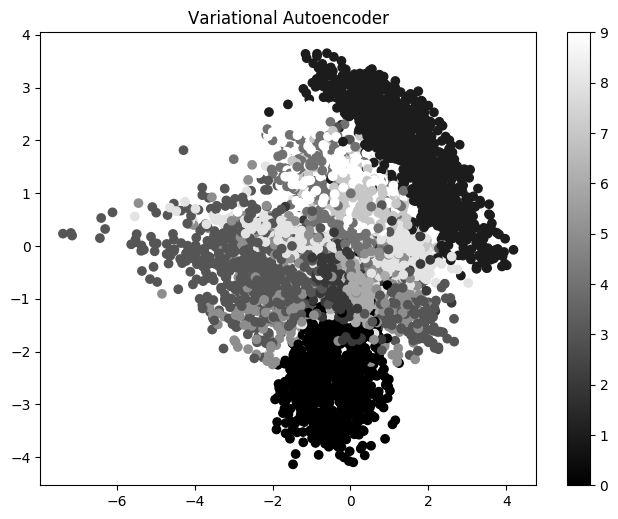

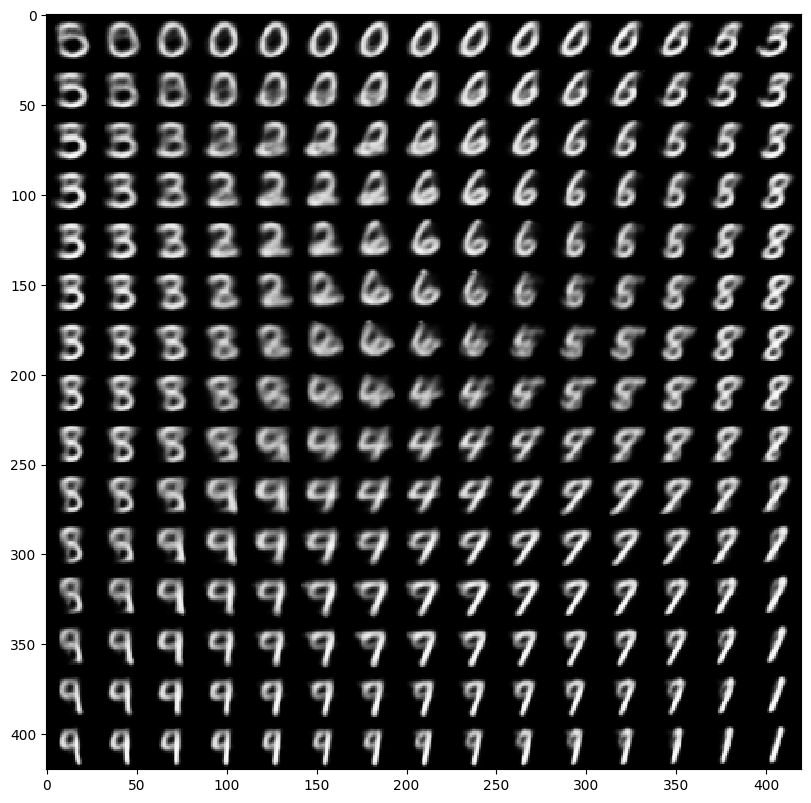

In [5]:
"""
 This script demonstrates how to build a variational autoencoder with Keras.
 #Reference
 - Auto-Encoding Variational Bayes
   https://arxiv.org/abs/1312.6114
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon


# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# instantiate VAE model
vae = Model(x, x_decoded_mean)

# Compute VAE loss
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

# train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2,
        validation_data=(x_test, None))

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.title('Variational Autoencoder')
plt.colorbar()
plt.show()

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(figure, cmap='Greys_r')
plt.show()

K.clear_session()

variational_autoencoder_devconv.py

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 1)    5           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   320         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
____________________________________________________________________________________________

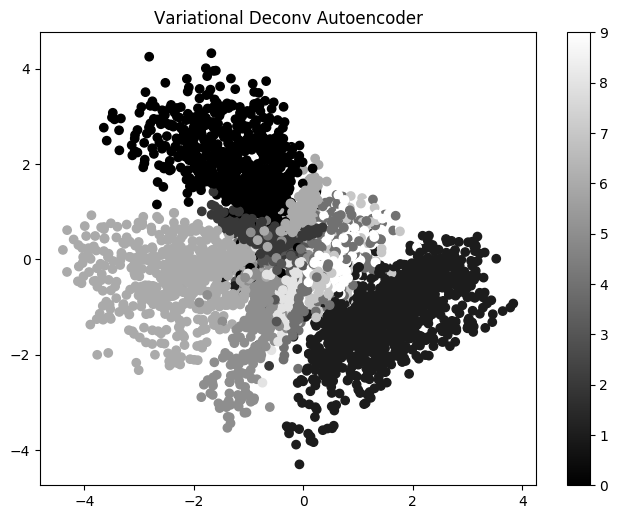

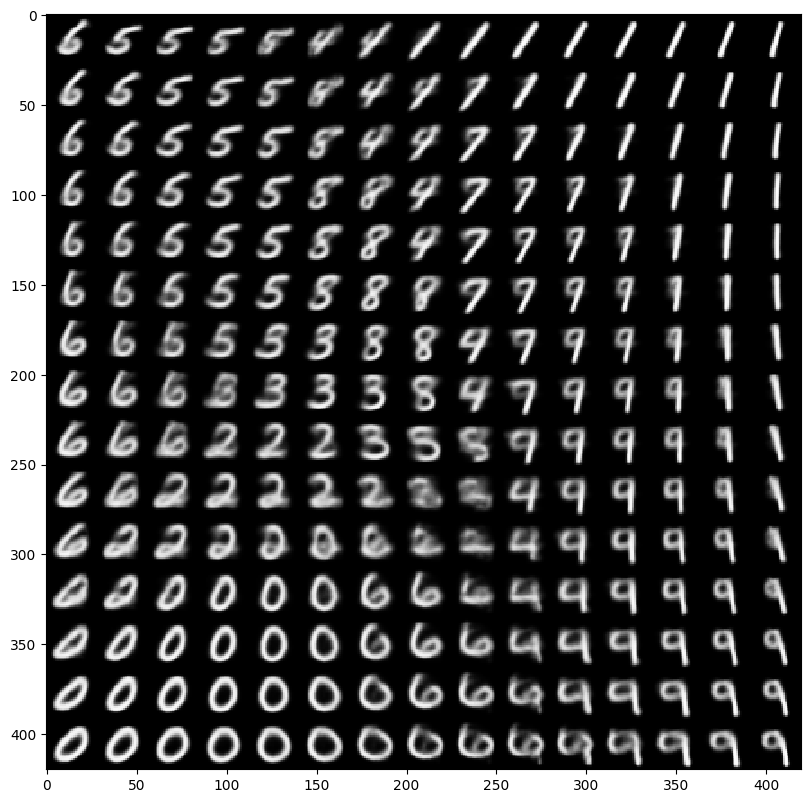

In [6]:
"""
This script demonstrates how to build a variational autoencoder
with Keras and deconvolution layers.
# Reference
- Auto-Encoding Variational Bayes
  https://arxiv.org/abs/1312.6114
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols, img_chns = 28, 28, 1
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3

batch_size = 100
if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
epochs = 5

x = Input(shape=original_img_size)
conv_1 = Conv2D(img_chns,
                kernel_size=(2, 2),
                padding='same', activation='relu')(x)
conv_2 = Conv2D(filters,
                kernel_size=(2, 2),
                padding='same', activation='relu',
                strides=(2, 2))(conv_1)
conv_3 = Conv2D(filters,
                kernel_size=num_conv,
                padding='same', activation='relu',
                strides=1)(conv_2)
conv_4 = Conv2D(filters,
                kernel_size=num_conv,
                padding='same', activation='relu',
                strides=1)(conv_3)
flat = Flatten()(conv_4)
hidden = Dense(intermediate_dim, activation='relu')(flat)

z_mean = Dense(latent_dim)(hidden)
z_log_var = Dense(latent_dim)(hidden)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon


# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_var])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(filters * 14 * 14, activation='relu')

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, filters)

decoder_reshape = Reshape(output_shape[1:])
decoder_deconv_1 = Conv2DTranspose(filters,
                                   kernel_size=num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
decoder_deconv_2 = Conv2DTranspose(filters,
                                   kernel_size=num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, filters)
decoder_deconv_3_upsamp = Conv2DTranspose(filters,
                                          kernel_size=(3, 3),
                                          strides=(2, 2),
                                          padding='valid',
                                          activation='relu')
decoder_mean_squash = Conv2D(img_chns,
                             kernel_size=2,
                             padding='valid',
                             activation='sigmoid')

hid_decoded = decoder_hid(z)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)

# instantiate VAE model
vae = Model(x, x_decoded_mean_squash)

# Compute VAE loss
xent_loss = img_rows * img_cols * metrics.binary_crossentropy(
    K.flatten(x),
    K.flatten(x_decoded_mean_squash))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='rmsprop')
vae.summary()

# train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((x_test.shape[0],) + original_img_size)

print('x_train.shape:', x_train.shape)

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        verbose=2,
        validation_data=(x_test, None))

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.title('Variational Deconv Autoencoder')
plt.colorbar()
plt.show()

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(figure, cmap='Greys_r')
plt.show()

K.clear_session()

visualize_latent_space.py

Pre-extracted features found. Loading them ...
t-SNE happening ...!


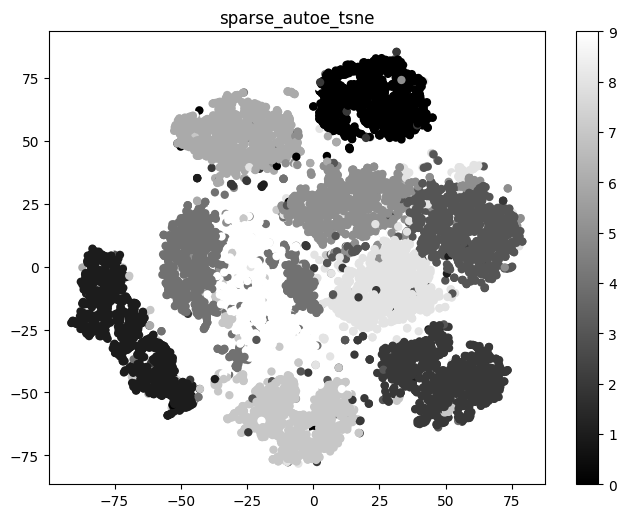

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
import os

# tsne_features_path = 'simple_autoe_tsne.pickle'
# autoe_features_path = 'simple_autoe_features.pickle'
# autoe_labels_path = 'simple_autoe_labels.pickle'

tsne_features_path = 'sparse_autoe_tsne.pickle'
autoe_features_path = 'sparse_autoe_features.pickle'
autoe_labels_path = 'sparse_autoe_labels.pickle'

# tsne_features_path = 'deep_autoe_tsne.pickle'
# autoe_features_path = 'deep_autoe_features.pickle'
# autoe_labels_path = 'deep_autoe_labels.pickle'

# TODO
# tsne_features_path = 'denoise_autoe_tsne.pickle'
# autoe_features_path = 'denoise_autoe_features.pickle'

# TODO
# tsne_features_path = 'conv_autoe_tsne.pickle'
# autoe_features_path = 'conv_autoe_features.pickle'

tsne_features = None

if os.path.exists(autoe_labels_path):
    labels = pickle.load(open(autoe_labels_path, 'rb'))

    if os.path.exists(tsne_features_path):
        print('t-sne features found. Loading ...')
        tsne_features = pickle.load(open(tsne_features_path, 'rb'))
    else:
        if os.path.exists(autoe_features_path):
            print('Pre-extracted features found. Loading them ...')
            latent_space = pickle.load(open(autoe_features_path, 'rb'))

            print('t-SNE happening ...!')
            tsne_features = TSNE().fit_transform(latent_space)

            pickle.dump(tsne_features, open(tsne_features_path, 'wb'))
        else:
            print('Nothing found ...')

    if tsne_features.any():
        plt.figure(figsize=(8, 6), dpi=100)
        plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, edgecolors='none')
        plt.title(os.path.splitext(tsne_features_path)[0])
        plt.colorbar()
        plt.show()
else:
    print('No labels')